In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # Read dataset - Diabetes
data = pd.read_csv("/content/drive/MyDrive/best-selling-mobile-phones.csv")

In [ ]:
data

,manufacturer,model,form,smartphone,year,units_sold_m
0,Nokia,1100,Bar,No,2003,250.0
1,Nokia,1110,Bar,No,2005,247.5
2,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen,Yes,2014,224.0
3,Nokia,"105 (2013), 105 (2015)",Bar,No,2013,200.0
4,Apple,iPhone 6S and iPhone 6S Plus,Touchscreen,Yes,2015,174.1
...,...,...,...,...,...,...
106,LG,G2,Touchscreen,Yes,2013,3.0
107,LeTV,LeEco Le 1s,Touchscreen,Yes,2016,3.0
108,Google,Pixel and Pixel XL,Touchscreen,Yes,2016,2.1
109,Palm,Centro,Keyboard bar,Yes,2007,2.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  111 non-null    object 
 1   model         111 non-null    object 
 2   form          111 non-null    object 
 3   smartphone    111 non-null    object 
 4   year          111 non-null    int64  
 5   units_sold_m  111 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.3+ KB


In [ ]:
label_encoder = LabelEncoder()
data['model'] = label_encoder.fit_transform(data['model'])
data['smartphone'] = label_encoder.fit_transform(data['smartphone'])

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', KMeans(n_clusters=3, random_state=0))])


In [ ]:
scaler = StandardScaler()
X = data[['model', 'smartphone']]
X_scaled = scaler.fit_transform(X)

In [ ]:
# Menentukan jumlah klaster (k)
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
data['cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Menampilkan hasil klastering
print(data)

    manufacturer  model          form  smartphone  year  units_sold_m  cluster
0          Nokia      1           Bar           0  2003         250.0        1
1          Nokia      2           Bar           0  2005         247.5        1
2          Apple    104   Touchscreen           1  2014         224.0        0
3          Nokia      0           Bar           0  2013         200.0        1
4          Apple    105   Touchscreen           1  2015         174.1        0
..           ...    ...           ...         ...   ...           ...      ...
106           LG     34   Touchscreen           1  2013           3.0        2
107         LeTV     70   Touchscreen           1  2016           3.0        0
108       Google     82   Touchscreen           1  2016           2.1        0
109         Palm     26  Keyboard bar           1  2007           2.0        2
110        Nokia     79   Tilt slider           1  2009           2.0        0

[111 rows x 7 columns]


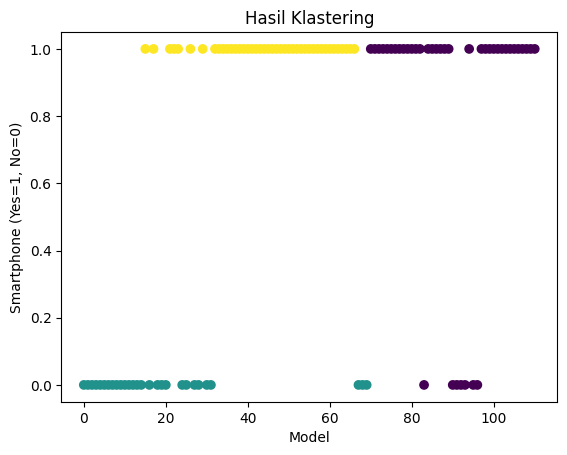

In [ ]:
# Visualisasi klaster
plt.scatter(data['model'], data['smartphone'], c=data['cluster'], cmap='viridis')
plt.xlabel('Model')
plt.ylabel('Smartphone (Yes=1, No=0)')
plt.title('Hasil Klastering')
plt.show()

In [ ]:
cluster_counts = data['cluster'].value_counts()

(-1.0999986818974912,
 1.0999950323461507,
 -1.0999987898329553,
 1.0999998089537455)

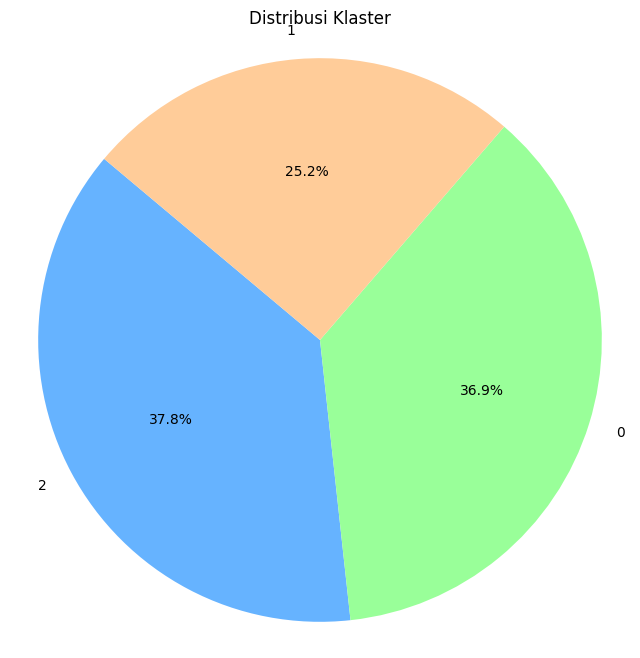

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribusi Klaster')
plt.axis('equal')  # Membuat pie diagram menjadi lingkaran


In [ ]:
plt.show()

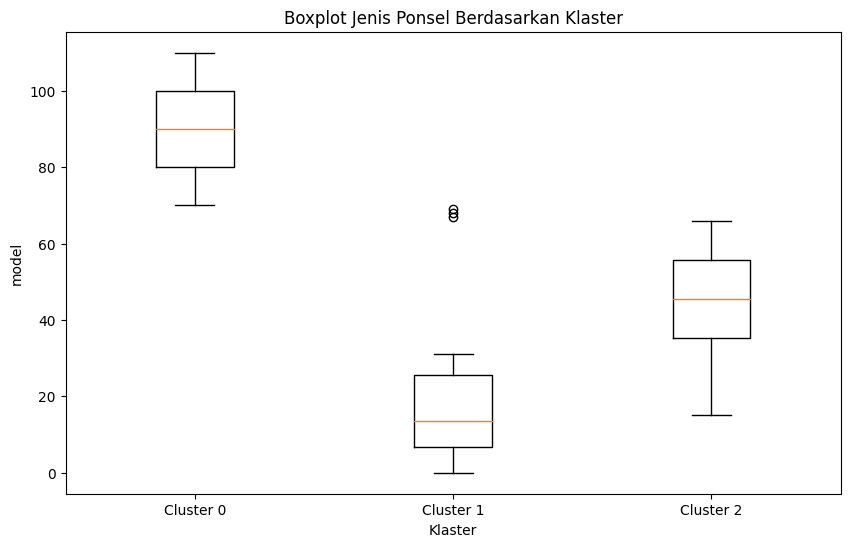

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['cluster'] == i]['model'] for i in range(k)], labels=[f'Cluster {i}' for i in range(k)])
plt.title('Boxplot Jenis Ponsel Berdasarkan Klaster')
plt.xlabel('Klaster')
plt.ylabel('model')
plt.show()

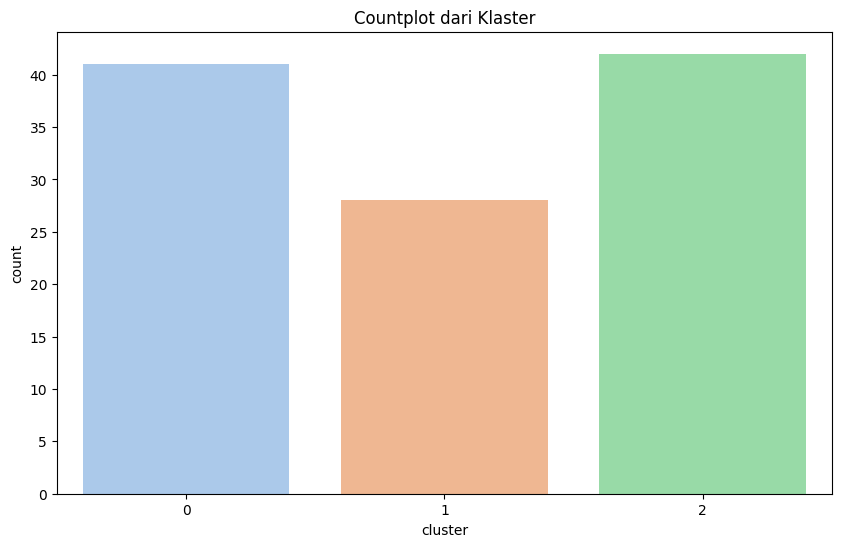

<ipython-input-49-e953ea09da43>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data.groupby('cluster').mean()


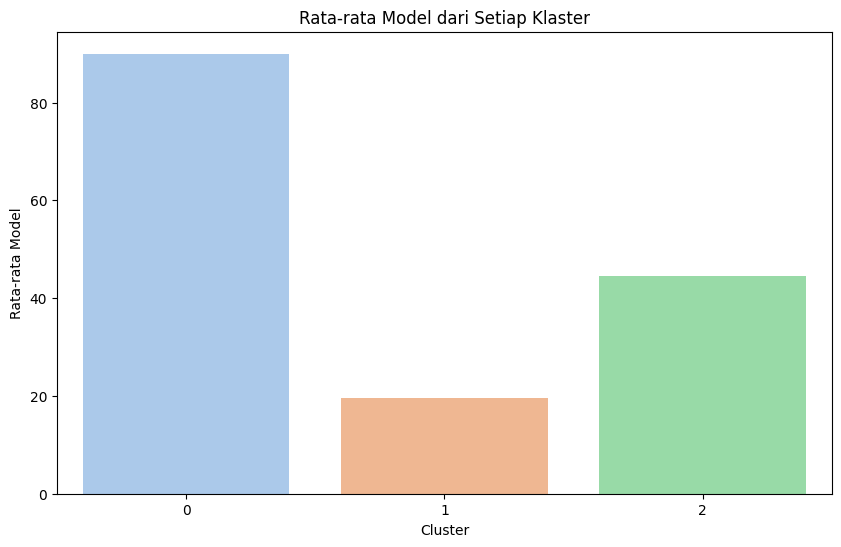

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=data, palette='pastel')
plt.title('Countplot dari Klaster')
plt.show()

# Barplot
cluster_means = data.groupby('cluster').mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y=cluster_means['model'], palette='pastel')
plt.title('Rata-rata Model dari Setiap Klaster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Model')
plt.show()


In [ ]:
dataset = data.copy()
dataset.head()

,manufacturer,model,form,smartphone,year,units_sold_m,cluster
0,Nokia,1,Bar,0,2003,250.0,1
1,Nokia,2,Bar,0,2005,247.5,1
2,Apple,104,Touchscreen,1,2014,224.0,0
3,Nokia,0,Bar,0,2013,200.0,1
4,Apple,105,Touchscreen,1,2015,174.1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for columns except Survived
for c in dataset.columns[1:]:
    if(dataset[c].dtype=='object'): # if column type = object (like "Tiket" and "Sex")
        dataset[c] = encoder.fit_transform(dataset[c])
    else: # else get the self column value without encode
        dataset[c] = dataset[c]

dataset.head()

,manufacturer,model,form,smartphone,year,units_sold_m,cluster
0,Nokia,1,0,0,2003,250.0,1
1,Nokia,2,0,0,2005,247.5,1
2,Apple,104,6,1,2014,224.0,0
3,Nokia,0,0,0,2013,200.0,1
4,Apple,105,6,1,2015,174.1,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  111 non-null    object 
 1   model         111 non-null    int64  
 2   form          111 non-null    int64  
 3   smartphone    111 non-null    int64  
 4   year          111 non-null    int64  
 5   units_sold_m  111 non-null    float64
 6   cluster       111 non-null    int32  
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 5.8+ KB
